In [11]:
!pip install pillow
!pip install keras
!pip install sagemaker-tensorflow
!pip install cmake tensorflow

     |████████████████████████████████| 16.5MB 29.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/85/d4/c0cd1057b331bc38b65478302114194bd8e1b9c2bbc06e300935c0e93d90/tensorflow-2.1.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
Processing /home/ec2-user/.cache/pip/wheels/d7/de/2e/efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd/wrapt-1.11.2-cp36-cp36m-linux_x86_64.whl
Processing /home/ec2-user/.cache/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833/opt_einsum-3.1.0-cp36-none-a

In [3]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 19.7MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

Using TensorFlow backend.


In [2]:
# Directory path
train_data_dir = 'data/Cracks/train'
test_data_dir = 'data/Cracks/test'

# Get all the data in the directory data/validation, and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(256, 256), batch_size=463)

# Get all the data in the directory data/train, and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(256, 256), batch_size=1839)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 463 images belonging to 2 classes.
Found 1839 images belonging to 2 classes.


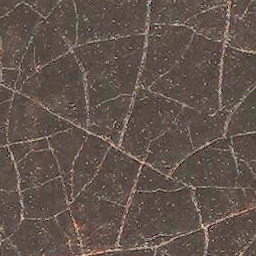

In [3]:
# Previewing an image
array_to_img(train_images[15])

In [4]:
# Checking shape of data
print('train data shape:', np.shape(train_images), np.shape(train_labels))
print('test data shape:', np.shape(test_images), np.shape(test_labels))

train data shape: (1839, 256, 256, 3) (1839, 2)
test data shape: (463, 256, 256, 3) (463, 2)


In [5]:
# Unrowing/reshaping
train_img = train_images.reshape(train_images.shape[0], -1)
print('train_img:', np.shape(train_img))

test_img = test_images.reshape(test_images.shape[0], -1)
print('test_img:', np.shape(test_img))

train_img: (1839, 196608)
test_img: (463, 196608)


In [6]:
# Looking at the labels
train_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [7]:
train_generator.class_indices

{'Dutch': 0, 'Flemish': 1}

In [8]:
# Transposing the labels
train_y = np.reshape(train_labels[:,0], (1839,1))
print('train labels final:', np.shape(train_y))

test_y = np.reshape(test_labels[:,0], (463,1))
print('test labels final:', np.shape(test_y))

train labels final: (1839, 1)
test labels final: (463, 1)


In [9]:
from keras import models
from keras import layers

In [31]:
np.random.seed(123)
model1 = models.Sequential()
model1.add(layers.Conv2D(filters=10, kernel_size=10, strides=2, activation='relu',
                        input_shape=(256, 256,  3)))
model1.add(layers.MaxPooling2D((10, 10)))

# model.add(layers.Conv2D(filters=10, kernel_size=5, strides=2,activation='relu'))
# model.add(layers.MaxPooling2D((4, 4)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))


model1.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model1.add(layers.Dense(20, activation='relu'))
model1.add(layers.Dense(100, activation='relu'))
model1.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
# from keras.optimizers import SGD
# opt = SGD(lr=0.00001)

model1.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_1 = model1.fit(train_images,
                    train_y,
                    epochs=1000,
                    batch_size=32,
                    validation_split=0.3)

Train on 1287 samples, validate on 552 samples
Epoch 1/1000
1287/1287 [==============================] - 7s 5ms/step - loss: 1.7119 - acc: 0.5260 - val_loss: 1.0354 - val_acc: 0.5525
Epoch 2/1000
1287/1287 [==============================] - 5s 4ms/step - loss: 0.9852 - acc: 0.5493 - val_loss: 0.9219 - val_acc: 0.5507
Epoch 3/1000
1287/1287 [==============================] - 5s 4ms/step - loss: 0.8752 - acc: 0.5610 - val_loss: 0.8568 - val_acc: 0.5507
Epoch 4/1000
1287/1287 [==============================] - 5s 4ms/step - loss: 0.8120 - acc: 0.5462 - val_loss: 0.7866 - val_acc: 0.5525
Epoch 5/1000
1287/1287 [==============================] - 5s 4ms/step - loss: 0.7572 - acc: 0.5688 - val_loss: 0.7464 - val_acc: 0.5543
Epoch 6/1000
1287/1287 [==============================] - 5s 4ms/step - loss: 0.7285 - acc: 0.5618 - val_loss: 0.7312 - val_acc: 0.5435
Epoch 7/1000
1287/1287 [==============================] - 5s 4ms/step - loss: 0.7135 - acc: 0.5719 - val_loss: 0.7162 - val_acc: 0.5779
E

In [10]:
np.random.seed(123)
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=10, kernel_size=10, strides=2, activation='relu',
                        input_shape=(256, 256,  3)))
model2.add(layers.MaxPooling2D((10, 10)))

model2.add(layers.Conv2D(filters=10, kernel_size=5, strides=2,activation='relu'))
model2.add(layers.MaxPooling2D((4, 4)))

model2.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
model2.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))


model2.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model2.add(layers.Dense(20, activation='relu'))
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [11]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
# from keras.optimizers import SGD
# opt = SGD(lr=0.00001)

model2.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_2 = model2.fit(train_images,
                    train_y,
                    epochs=1000,
                    batch_size=16,
                    validation_split=0.3)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1287 samples, validate on 552 samples
Epoch 1/1000
1287/1287 [==============================] - 8s 7ms/step - loss: 0.6875 - acc: 0.5641 - val_loss: 0.6835 - val_acc: 0.5290
Epoch 2/1000
1287/1287 [==============================] - 6s 4ms/step - loss: 0.6783 - acc: 0.5688 - val_loss: 0.6845 - val_acc: 0.5417
Epoch 3/1000
1287/1287 [==============================] - 6s 4ms/step - loss: 0.6762 - acc: 0.5719 - val_loss: 0.6808 - val_acc: 0.5453
Epoch 4/1000
1287/1287 [==============================] - 6s 4ms/step - loss: 0.6748 - acc: 0.5711 - val_loss: 0.6804 - val_acc: 0.5471
Epoch 5/1000
1287/1287 [==============================] - 6s 4ms/step - loss: 0.6735 - acc: 0.5734 - val_loss: 0.6795 - val_acc: 0.5471
Epoch 6/1000
1287/1287 [==============================] - 6s 4ms/step - loss: 0.6721 - acc: 0.5711 - val_loss: 0.6782 - val_acc: 0.5507
Epoch 7/1000
1287/1287 [================

In [16]:
from keras.models import load_model

model2.save('models/color_model_1.h5')